In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, neighbors
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import  cross_val_score
import pandas as pd

In [7]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [8]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [20]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

X = np.array(df.drop(['class'],1))
Y = np.array(df['class'])
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

scores = cross_val_score(clf, X, Y, cv=5)
print("Mean cross validation score is %s" % (scores.mean() * 100) + "%")

import time
start_time = time.perf_counter()
print("Runtime is %s seconds" % (time.perf_counter() - start_time))

Mean cross validation score is 93.14059755235326%
Runtime is 2.2738531640698056e-05 seconds


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = np.array(df.drop(['class'],1))
Y = np.array(df['class'])
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

scores = cross_val_score(clf, X, Y, cv=5)
print("Mean cross validation score is %s" % (scores.mean() * 100) + "%")

import time
start_time = time.perf_counter()
print("Runtime is %s seconds" % (time.perf_counter() - start_time))  

Mean cross validation score is 95.01105741546581%
Runtime is 2.0183640515369916e-05 seconds


## The random forest model returned a higher mean cross validation score and returned in a faster runtime. As such, this model perfoms better. 

## Next I will determine the feature importance of the random forest model.

Feature ranking:
1. feature 2 (0.440250)
2. feature 1 (0.264991)
3. feature 5 (0.127871)
4. feature 0 (0.061925)
5. feature 4 (0.031770)
6. feature 6 (0.029063)
7. feature 7 (0.019420)
8. feature 3 (0.015784)
9. feature 8 (0.008926)


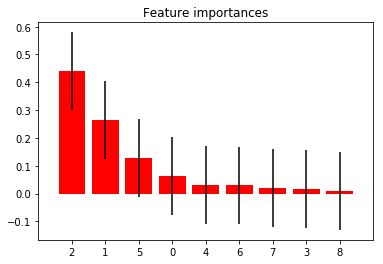

In [22]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=1)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()